# Task 6.6

## Table of Content

## 1 Importing Libraries and Datasets

In [1]:
# Import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
# Using .api imports the public access version of statsmodels, which is a library that handles statistical models.
import os
import warnings 
# This is a library that handles warnings.

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = '4gEhaWPEx_zGcze2xuyB'

In [3]:
# Import the 'Carbon Dioxide (CO2) Emmissions - Total Europe'
data = quandl.get('BP/C02_EMMISSIONS_EUR')

In [4]:
data.head()

,Value
Date,
1965-12-31,3427.810483
1966-12-31,3474.885568
1967-12-31,3543.858134
1968-12-31,3757.726642
1969-12-31,4008.326486


In [5]:
data.shape

(56, 1)

In [6]:
type(data)

pandas.core.frame.DataFrame

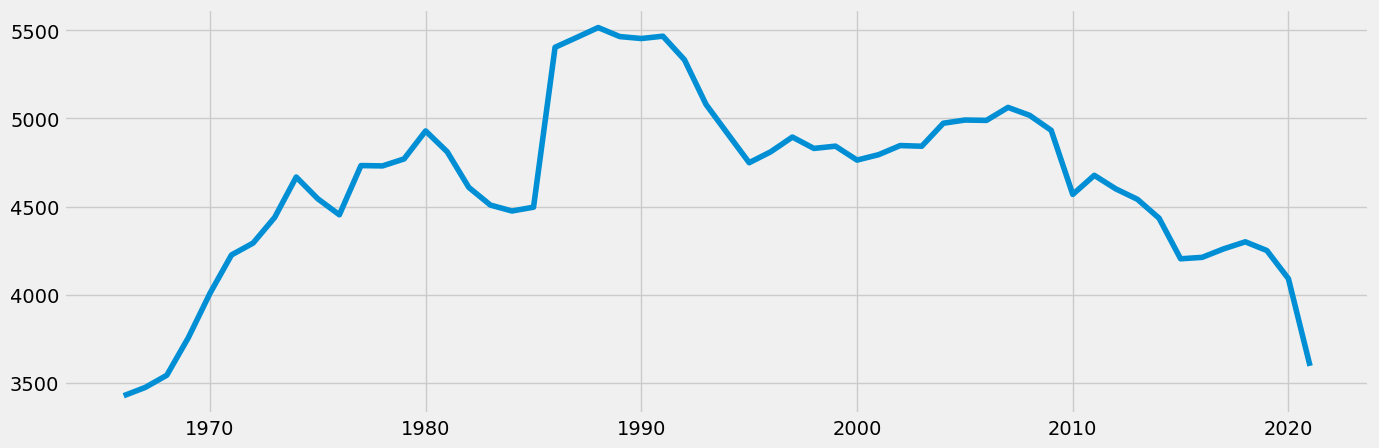

In [7]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data)

## 2 Subsetting, wrangling, and cleaning time-series data

In [8]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [9]:
# Set the "Date" column as the index

from datetime import datetime

data_2['datetime'] = pd.to_datetime(data_2['Date']) # Create a datetime column from "Date.""
data_2 = data_2.set_index('datetime') # Set the datetime as the index of the dataframe.
data_2.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_2.head()

,Value
datetime,
1965-12-31,3427.810483
1966-12-31,3474.885568
1967-12-31,3543.858134
1968-12-31,3757.726642
1969-12-31,4008.326486


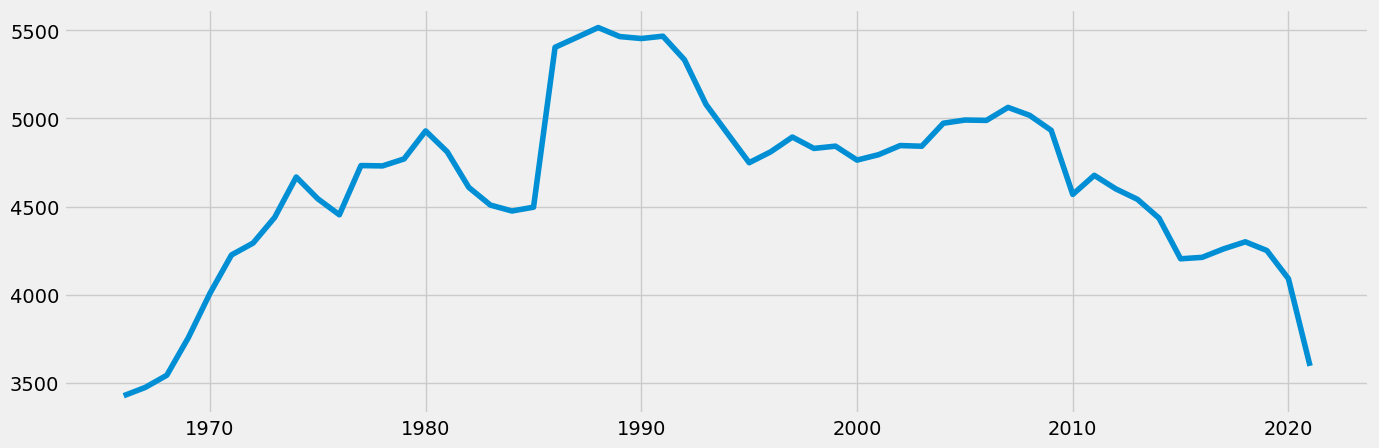

In [10]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_2)

In [11]:
# Check for missing values

data_2.isnull().sum() 

Value    0
dtype: int64

In [12]:
# Check for duplicates

dups = data_2.duplicated()
dups.sum()

# No duplicates!

0

## 3 Time-series analysis: decomposition

In [13]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_2, model='additive')

In [14]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

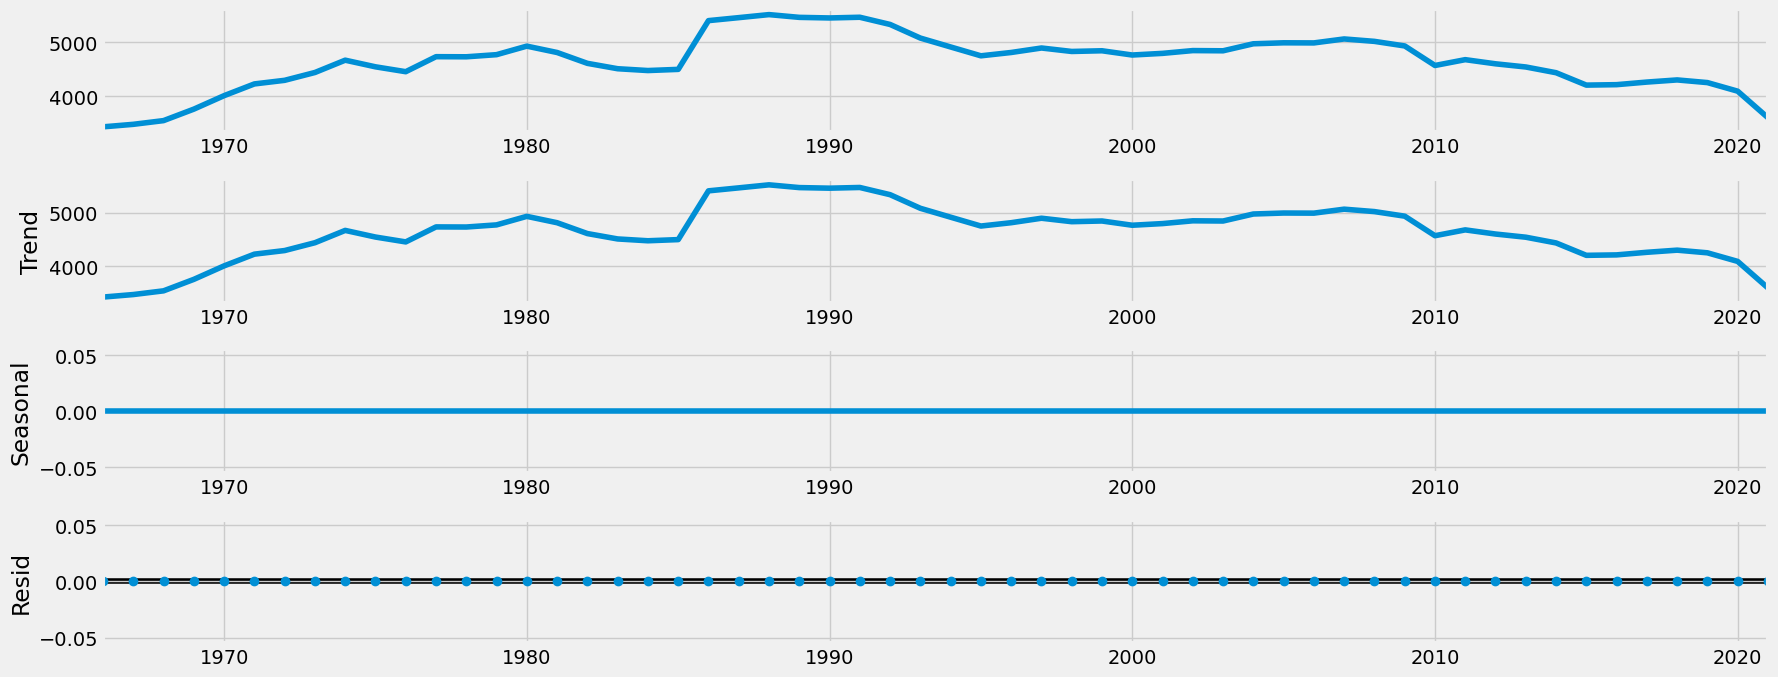

In [15]:
# Plot the separate components

decomposition.plot()
plt.show()

#### Since the data does not contain much noise, the level and trend do not differ from each other.
#### There was an upward until 1990 (with a big dip between 1980 - 1985). However, since 1990 there has been a downward trend.
#### The seasonal line is flat, indicating that there is no seasonality present.

## 4 Testing for stationarity

In [16]:
# Import the adfuller() function

from statsmodels.tsa.stattools import adfuller

# Define the function

def dickey_fuller(timeseries):
    
    # Perform the Dickey-Fuller test:
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series

dickey_fuller(data_2['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.756806
p-value                         0.402107
Number of Lags Used             0.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


#### Null hypothesis: "There is a presence of unit root in the data."
#### Alternative hypothesis: "There is no presence of unit root in the data."
#### The Dickey-Fuller stationary test has shown that the test statistic value is greater than the critical value of 5%. Therefore, we cannot reject the null hypothesis.
#### That would mean that there is a unit root in the data, and therefore the data is non-stationary.

## 5 Stationarizing the Data - Differencing

In [17]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

data_diff = data_2 - data_2.shift(1)

In [18]:
# Remove the missing values that came about as a result of the differencing.

data_diff.dropna(inplace = True)

In [19]:
data_diff.head()

,Value
datetime,
1966-12-31,47.075085
1967-12-31,68.972566
1968-12-31,213.868508
1969-12-31,250.599843
1970-12-31,217.794394


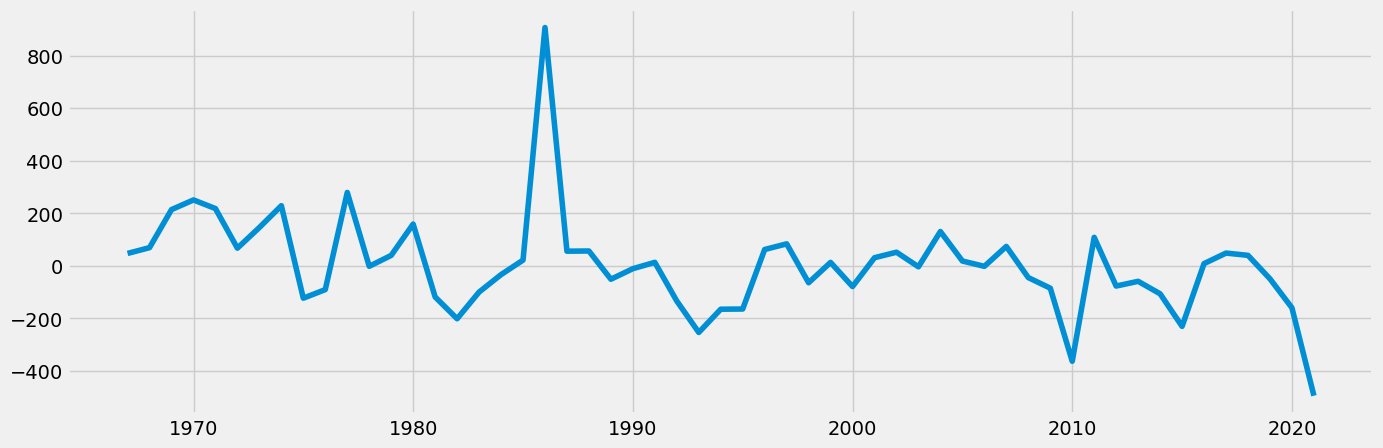

In [20]:
# Check the time-series curve after differencing

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [21]:
# Perform the Dickey-Fuller test again

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.149082
p-value                         0.000011
Number of Lags Used             0.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


#### The test statistic value is lower than the critical value at 1% significance level, therefore we can with confidence reject the null hypothesis. The time-series curve has become stationary.

## 6 Check for Autocorrelation

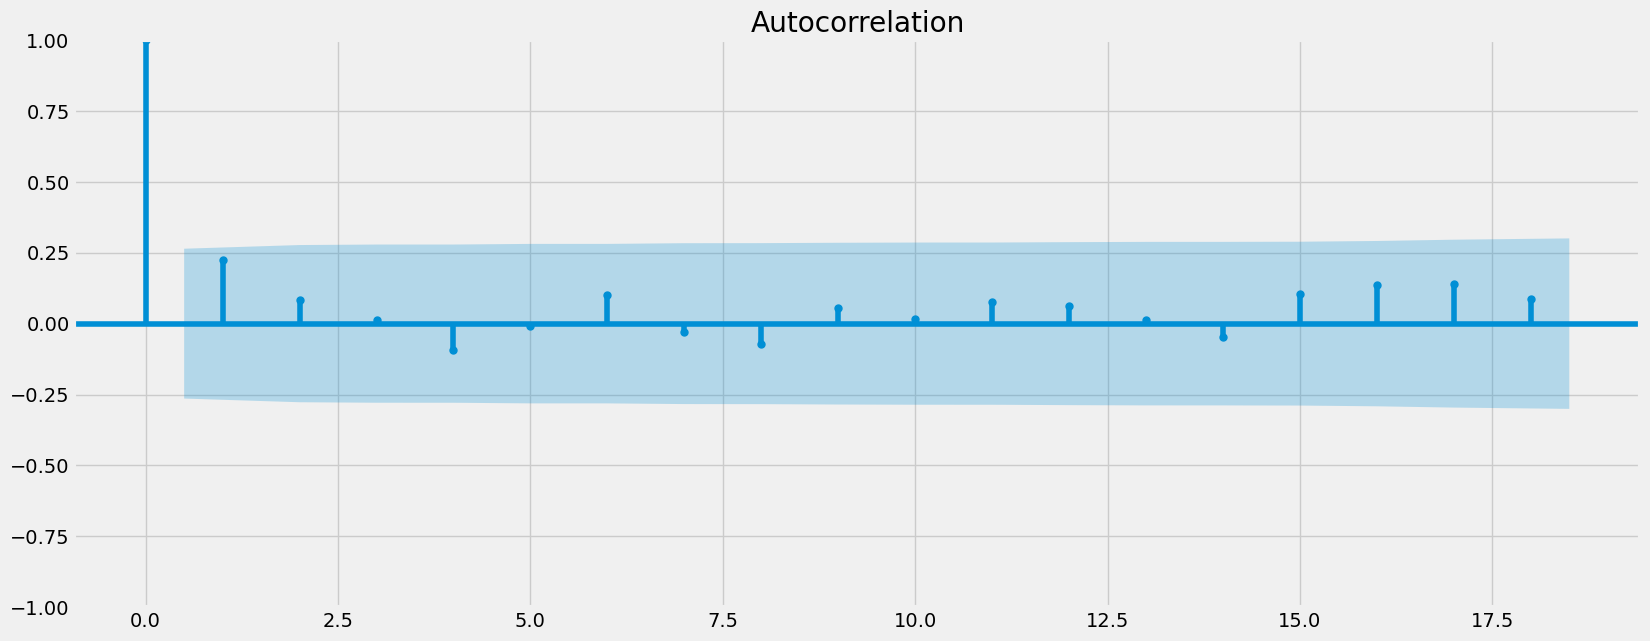

In [22]:
# Check the plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff)
plt.show()

#### The autocorrelation plot is indicating that the data is stationary.